In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
CODE_PATH = os.getcwd()
BASE_PATH =  os.path.dirname(CODE_PATH) + '/'
print(BASE_PATH)
DATA_PATH = BASE_PATH + 'data/'

/home/masa1357/Dockerdata/gitfile/signate_LiverDiseaseDetermination/


In [ ]:
train = pd.read_csv(DATA_PATH + 'train.csv')
test = pd.read_csv(DATA_PATH + 'test.csv')
df = pd.concat([train.drop(['disease'],axis=1), test], axis=0, sort=False)
df.head(3)

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952


In [ ]:
df.isnull().sum()

Age         0
Gender      0
T_Bil       0
D_Bil       0
ALP         0
ALT_GPT     0
AST_GOT     0
TP          0
Alb         0
AG_ratio    0
dtype: int64

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df.head(1)

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio
0,59,0,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'T_Bil'}>],
       [<Axes: title={'center': 'D_Bil'}>,
        <Axes: title={'center': 'ALP'}>,
        <Axes: title={'center': 'ALT_GPT'}>],
       [<Axes: title={'center': 'AST_GOT'}>,
        <Axes: title={'center': 'TP'}>, <Axes: title={'center': 'Alb'}>],
       [<Axes: title={'center': 'AG_ratio'}>, <Axes: >, <Axes: >]],
      dtype=object)

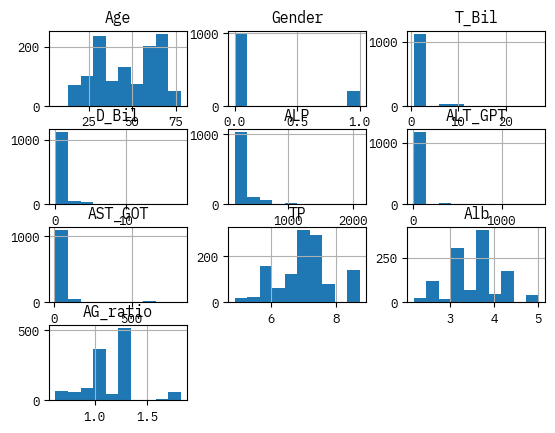

In [ ]:
df.hist()

In [ ]:
# データの可視化
import seaborn as sns
from   matplotlib import pyplot as plt
sns.set(style='darkgrid')
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_87271/648303148.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(disease_0)
/tmp/ipykernel_87271/648303148.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(disease_1)


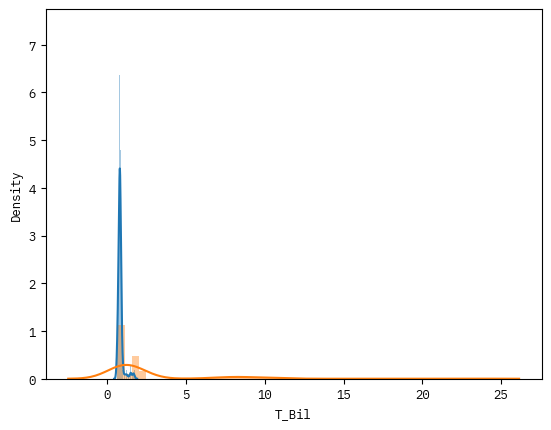

In [ ]:
 #列名をリスト化して 
prods = train.columns.tolist()
prods
 #疾患のありなしで確認する 。
disease_0= train.query("disease== 0")[prods[2]]
disease_1 = train.query("disease== 1")[prods[2]]
sns.distplot(disease_0)
sns.distplot(disease_1)
plt.show()

In [ ]:
 #bining区切りをつける 。
# 上記から
bins_D_Bil = [0, 0.5, 1,1.5, 2]
# T_Bil列を分割し、0始まりの連番でラベル化した結果を、X_cutに格納する
X_cut, bin_indice = pd.cut(df["D_Bil"], bins=bins_D_Bil, retbins=True, labels=False)
# bin分割した結果をダミー変数化 (prefix=X_Cut.nameは、列名の接頭語を指定している)
X_dummies = pd.get_dummies(X_cut, prefix=X_cut.name)
# 元の説明変数のデータフレーム(X)と、ダミー変数化の結果(X_dummies)を横連結
df = pd.concat([df, X_dummies], axis=1)

In [ ]:
df.head(3)

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,D_Bil_0.0,D_Bil_1.0,D_Bil_2.0,D_Bil_3.0
0,59,0,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,True,False,False,False
1,69,0,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,True,False,False,False
2,65,0,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,True,False,False,False


In [ ]:
nrow, ncol = train.shape
print(nrow, ncol)

850 11


In [ ]:
train_df = df[:nrow].join(train['disease'])
train_df.head(3)

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,D_Bil_0.0,D_Bil_1.0,D_Bil_2.0,D_Bil_3.0,disease
0,59,0,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,True,False,False,False,0
1,69,0,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,True,False,False,False,1
2,65,0,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,True,False,False,False,0


In [ ]:
test_df = df[nrow:]
test_df.head(3)

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,D_Bil_0.0,D_Bil_1.0,D_Bil_2.0,D_Bil_3.0
0,25,0,0.801797,0.186800,214.448679,15.260516,19.496649,6.817903,3.600752,1.288006,True,False,False,False
1,26,1,0.834857,0.116426,234.136816,10.509159,16.733312,6.795433,3.111043,1.030562,True,False,False,False
2,64,0,0.791830,0.197940,216.039909,14.578304,20.695866,7.524030,3.627621,1.278579,True,False,False,False


### NN実装

In [ ]:
import torch

In [ ]:
x = torch.tensor(train_df.drop(['disease'], axis=1).values, dtype=torch.float32)
t = torch.tensor(train_df['disease'].values, dtype=torch.int64)
print(type(x), type(t))
print(x.dtype, t.dtype)
print(x.shape, t.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.int64
torch.Size([850, 10]) torch.Size([850])


In [ ]:
dataset = torch.utils.data.TensorDataset(x, t)
dataset[0]

(tensor([5.9000e+01, 0.0000e+00, 7.8689e-01, 1.5050e-01, 2.2018e+02, 1.3468e+01,
         2.1729e+01, 6.8157e+00, 3.1123e+00, 1.0068e+00]),
 tensor(0))

In [ ]:
n_train = int(len(dataset) * 0.6)
n_val = int(len(dataset) * 0.2)
n_test = len(dataset) - n_train - n_val
n_train, n_val, n_test

(510, 170, 170)

In [ ]:
# ランダムに分割を行うため、シードを固定して再現性を確保
torch.manual_seed(0)

# データセットの分割
train, val, test = torch.utils.data.random_split(dataset, [n_train, n_val, n_test])

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl
pl.__version__

'2.0.7'

In [ ]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()


In [ ]:
# 学習データに対する処理
class TrainNet(pl.LightningModule):

    # @pl.data_loader
    def train_dataloader(self):
        return torch.utils.data.DataLoader(train, self.batch_size, shuffle=True)

    def training_step(self, batch, batch_nb):
        x, t = batch
        y = self.forward(x)
        loss = self.lossfun(y, t)
        self.log('train_loss', loss,
                 #prog_bar=True,
                 on_step=True,on_epoch=True)
        results = {'loss': loss}
        return results

In [ ]:
# 検証データに対する処理
class ValidationNet(pl.LightningModule):

    # @pl.data_loader
    def val_dataloader(self):
        return torch.utils.data.DataLoader(val, self.batch_size)

    def validation_step(self, batch, batch_nb):
        x, t = batch
        y = self.forward(x)
        loss = self.lossfun(y, t)
        y_label = torch.argmax(y, dim=1)
        acc = torch.sum(t == y_label) * 1.0 / len(t)
        self.log(
            'val_loss',
            loss,
            on_epoch=True,
            on_step=True,)
        self.log(
            'val_acc',
            acc,
            on_epoch=True,
            on_step=True,
        )
        results = {'val_loss': loss, 'val_acc': acc}
        return results

    def validation_end(self, outputs):
        avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
        avg_acc = torch.stack([x['val_acc'] for x in outputs]).mean()
        results = {'val_loss': avg_loss, 'val_acc': avg_acc}
        return results

In [ ]:
# テストデータに対する処理
class TestNet(pl.LightningModule):

    # @pl.data_loader
    def test_dataloader(self):
        return torch.utils.data.DataLoader(test, self.batch_size)

    def test_step(self, batch, batch_nb):
        x, t = batch
        y = self.forward(x)
        loss = self.lossfun(y, t)
        y_label = torch.argmax(y, dim=1)
        acc = torch.sum(t == y_label) * 1.0 / len(t)
        self.log('test_acc', acc)
        results = {'test_loss': loss, 'test_acc': acc}
        return results

    def test_end(self, outputs):
        avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
        avg_acc = torch.stack([x['test_acc'] for x in outputs]).mean()
        results = {'test_loss': avg_loss, 'test_acc': avg_acc}
        return results

In [ ]:
# 学習データ、検証データ、テストデータへの処理を継承したクラス
class Net(TrainNet, ValidationNet, TestNet):
    
    def __init__(self, input_size=14, hidden_size1=12,hidden_size2=8, output_size=4, batch_size=30):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.batch_size = batch_size
        self.bn = nn.BatchNorm1d(input_size)

    def forward(self, x):
        #x = self.bn(x)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

    def lossfun(self, y, t):
        return F.cross_entropy(y, t)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), lr=0.0001)

In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.loggers import CSVLogger
logger = CSVLogger("logs", name="my_exp_name")

In [ ]:
# 乱数のシード固定
torch.manual_seed(0)

# インスタンス化
net = Net()

In [ ]:
from pytorch_lightning.callbacks import EarlyStopping
early_stop_callback = EarlyStopping(monitor="val_acc", 
                                    min_delta=0.0000, 
                                    patience=20, 
                                    verbose=False, 
                                    mode="max")
# 学習用に用いるクラスの Trainer をインスタンス化
trainer = Trainer(accelerator="auto", devices=1, strategy="auto",logger=logger,max_epochs=1000
                  ,callbacks=[early_stop_callback])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [ ]:
# Trainer によるモデルの学習
trainer.fit(net)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name | Type        | Params
-------------------------------------
0 | fc1  | Linear      | 88    
1 | fc2  | Linear      | 54    
2 | fc3  | Linear      | 28    
3 | bn   | BatchNorm1d | 20    
-------------------------------------
190       Trainable params
0         Non-trainable params
190       Total params
0.001     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:281: PossibleUserWarning: The number of training batches (17) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower valu

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
trainer.test(net)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7235294580459595
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_acc': 0.7235294580459595}]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:438: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7235294580459595
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_acc': 0.7235294580459595}]

In [ ]:
X = torch.tensor(test_df.values, dtype=torch.float32)
y = net(X)
y

tensor([[ -2.2664,  -1.9349,  -8.8237,  -5.8406],
        [ -2.3769,  -2.2307,  -9.7716,  -6.3158],
        [ -1.9904,  -2.6210, -10.4331,  -6.0435],
        ...,
        [ -2.2391,  -1.9064,  -8.8249,  -5.8101],
        [ -2.5846,  -2.5078, -10.4126,  -6.7156],
        [ -3.5971,  -3.8689, -15.7776, -10.0477]], grad_fn=<AddmmBackward0>)

In [ ]:
y_labels = torch.argmax(y, dim=1)

# Creating a DataFrame for the output
output_df = pd.DataFrame({
    'Id': np.arange(len(y_labels)),
    'Prediction': y_labels.numpy()
})

In [ ]:
# 予測をCSVファイルに保存
output_df.to_csv('predictions.csv',header=False, index=False)